In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json

pd.options.mode.chained_assignment = None

In [2]:
#Paleta de cores do carnaval
my_palette = sns.color_palette(['#0455BF', '#05C7F2', '#D95204','#F2C84C', '#D95204'])

In [3]:
df = pd.read_csv('C:/Users/atlas/Downloads/df_nulos_tratados.csv')

df_v = df[df['morador']=='Visitantes']

df_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 12 to 1644
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  229 non-null    int64  
 1   Unnamed: 0.1                229 non-null    int64  
 2   morador                     229 non-null    object 
 3   numero_controle             229 non-null    int64  
 4   bloco                       229 non-null    object 
 5   bloco_classificacao         229 non-null    object 
 6   dt_visita                   229 non-null    object 
 7   dt_termino                  229 non-null    object 
 8   tempo_total_entrev          229 non-null    object 
 9   idade                       229 non-null    int64  
 10  pais                        229 non-null    object 
 11  estado                      224 non-null    object 
 12  cidade                      224 non-null    object 
 13  bairro_bh                   0 non

In [4]:
# Juntando Outros e Taxi em uma só categoria
df_v['t_transp'].replace(['Outro   Carona', 'Outro   Uber', 'Taxi'], 'Uber/Taxi/Carona', inplace=True)
transporte = df_v.groupby('t_transp', as_index=False).agg({'numero_controle':'nunique'})

transporte

,t_transp,numero_controle
0,Aviao,26
1,Carro,87
2,Trem,10
3,Uber/Taxi/Carona,17
4,onibus rodoviario,71


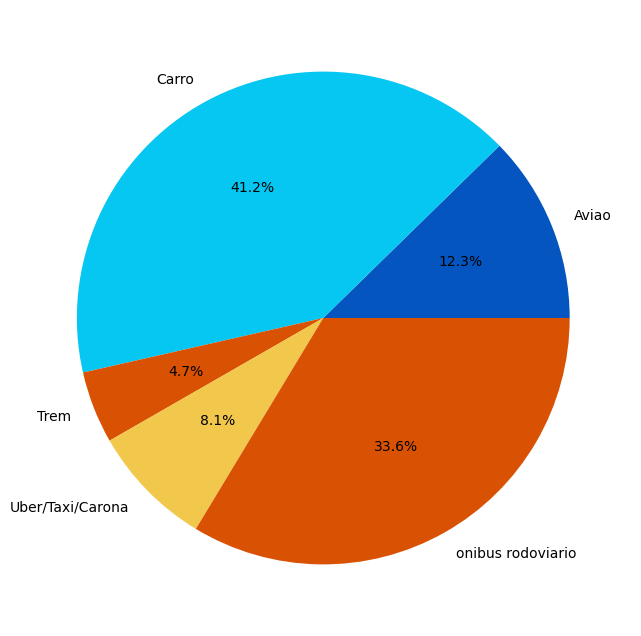

In [5]:
plt.figure(figsize=(10,8))
plt.pie(transporte['numero_controle'], labels=transporte['t_transp'], autopct='%1.1f%%', colors=my_palette)
plt.show()

In [6]:
# Juntando outros e Albergue em uma só categoria
df_v['t_hospedagem'].replace(['Albergue', 'Outro   airbnb', 'Outro   aluguel de quarto', 'Outro   carro', 'Outro   flat'], 'Outros', inplace=True)
hosped = df_v.groupby('t_hospedagem', as_index=False).agg({'numero_controle':'nunique'})

hosped

,t_hospedagem,numero_controle
0,Casa de Amigos/Parentes,161
1,Casa propria/alugada,10
2,Hoteis/Pousadas,34
3,Outros,5


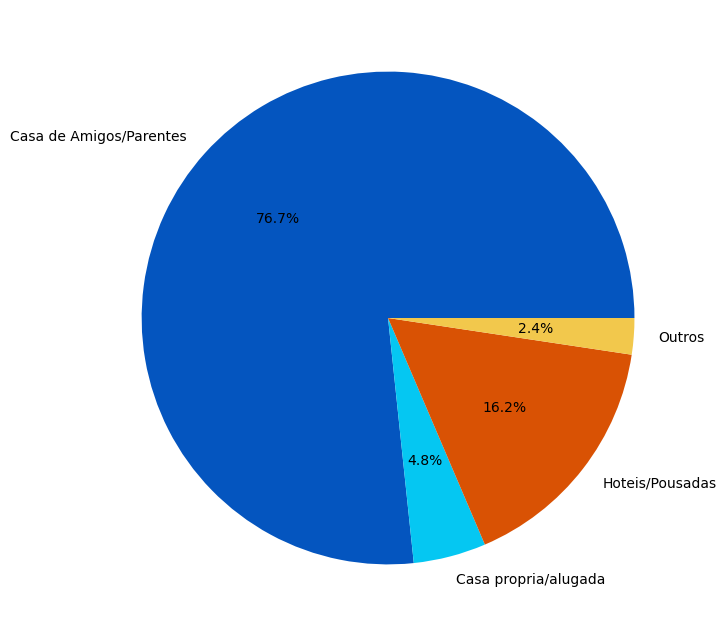

In [7]:
plt.figure(figsize=(10,8))
plt.pie(hosped['numero_controle'], labels=hosped['t_hospedagem'], autopct='%1.1f%%', colors=my_palette)
plt.show()

In [8]:
df_reg = df_v[~df_v['estado'].isin(['Sao Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Espirito Santo'])]
df_reg['estado'].replace('Amazonas', 'Norte', inplace=True)
df_reg['estado'].replace(['Bahia', 'Ceara', 'Maranhao', 'Pernambuco', 'Rio Grande do Norte'], 'Nordeste',inplace=True)
df_reg['estado'].replace(['Distrito Federal', 'Goias', 'Mato Grosso do Sul'], 'Centro-Oeste', inplace=True)
df_reg['estado'].replace(['Parana', 'Rio Grande do Sul', 'Santa Catarina'], 'Sul', inplace=True)
regions = df_reg.groupby('estado', as_index=False).agg({'numero_controle':'nunique'})
regions.columns = ['região', 'numero_visitantes']
regions

,região,numero_visitantes
0,Centro-Oeste,7
1,Nordeste,13
2,Norte,1
3,Sul,5


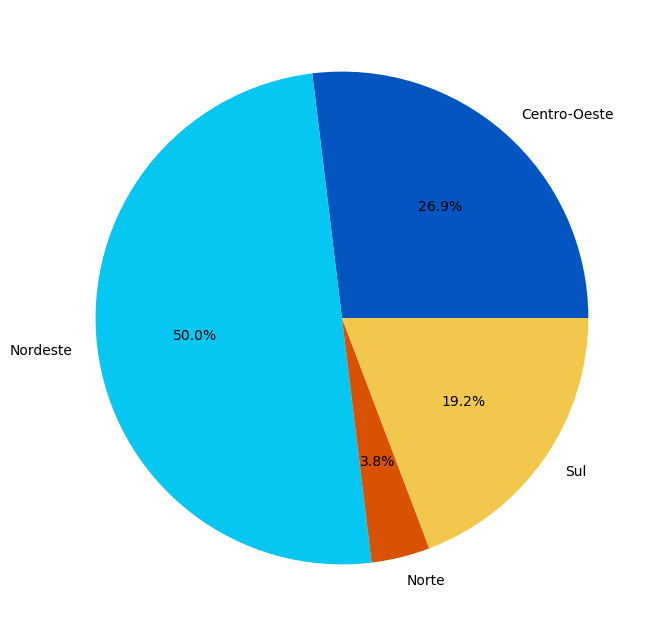

In [9]:
plt.figure(figsize=(10,8))
plt.pie(regions['numero_visitantes'], labels=regions['região'], autopct='%1.1f%%', colors=my_palette)
plt.show()

In [10]:
df_v['t_motivo'].value_counts() #sim quando o motivo da visita foi o carnaval

Sim              180
Nao               31
Nao respondeu     18
Name: t_motivo, dtype: int64

In [11]:
df_v['t_outromoivo'].value_counts()

Visitar amigos e parentes           18
Nao respondeu                       18
Lazer                                5
Negocios ou Trabalho                 3
Estudos ou cursos                    3
Congressos, feiras ou convençoes     1
Saude                                1
Name: t_outromoivo, dtype: int64

In [12]:
df_v['t_city_tour'].value_counts()

False    229
Name: t_city_tour, dtype: int64

In [13]:
df_v['t_visita_cultural'].value_counts()

False    223
True       6
Name: t_visita_cultural, dtype: int64

In [14]:
df_v['t_gastronomia'].value_counts()

False    209
True      20
Name: t_gastronomia, dtype: int64

**Os outros motivos para visitar BH durante o carnaval parecem pouco significantes**: poucas pessoas fizeram visitas culturais e gastronômicas, e nenhuma fez tour pela cidade. Quem foi na cidade por outro motivo parece ter ido visitar amigos ou parentes no período.

In [15]:
df_v['percentual_hospedagem'] = (df_v['t_hospedagem.1']/df_v['gasto_total'])*100
df_v['percentual_passeios'] = (df_v['t_atrativos_passeios']/df_v['gasto_total'])*100
df_v['percentual_transp'] = (df_v['transporte_interno']/df_v['gasto_total'])*100
df_v['percentual_compras'] = (df_v['compras']/df_v['gasto_total'])*100
df_v['percentual_ingressos'] = (df_v['ingressos']/df_v['gasto_total'])*100

In [16]:
gastos_df = pd.DataFrame(
    {'tipo_gasto': ['Hospedagem', 'Passeios', 'Transporte', 'Compras', 'Ingressos'],
     'percentual': [df_v['percentual_hospedagem'].mean(), df_v['percentual_passeios'].mean(), df_v['percentual_transp'].mean(),
                    df_v['percentual_compras'].mean(), df_v['percentual_ingressos'].mean()]}
)

gastos_df

,tipo_gasto,percentual
0,Hospedagem,54.101273
1,Passeios,26.075522
2,Transporte,18.085167
3,Compras,22.472896
4,Ingressos,19.140304


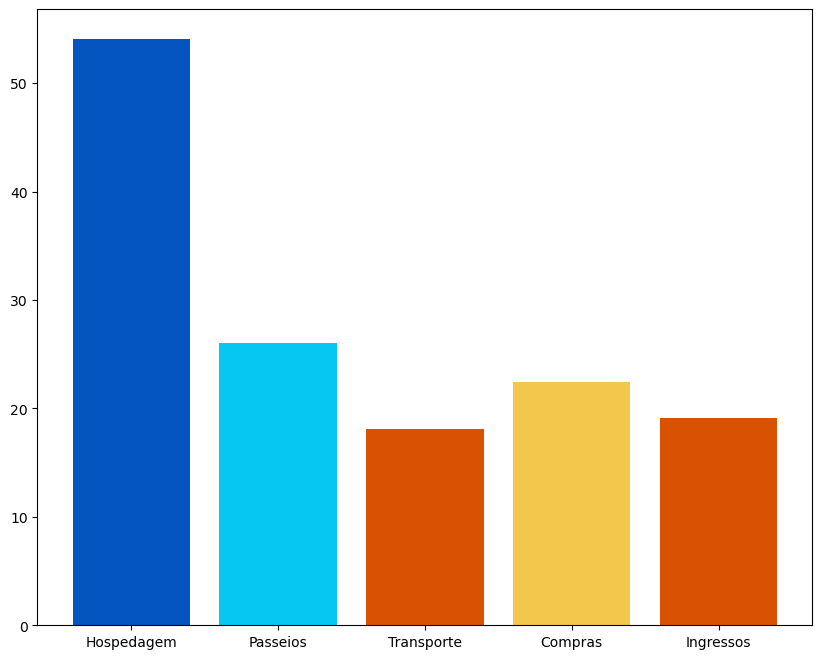

In [17]:
plt.figure(figsize=(10,8))
plt.bar(gastos_df['tipo_gasto'], gastos_df['percentual'], color=my_palette)
plt.show()